In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

#### features data is here :https://github.com/YZouzou/CS512-project/blob/main/processed_data/feature_data.csv

In [66]:
df_features = pd.read_csv("C:/Users/suuser/Desktop/CS_512_Project/Features_2008.csv",index_col=[0])

In [67]:
df_features.columns[3:26]

Index(['consumer_credits', 'consumer_price_index', 'brent_oil_price',
       'current_account_deficit', 'exports_usd', 'imports_usd',
       'export_unit_value_index_usd', 'gdp', 'gold_price_lon',
       'import_unit_value_index_usd', 'B', 'C', 'MIG_NRG_X_E', 'MIG_NDCOG',
       'MIG_ING', 'MIG_DCOG', 'MIG_CAG', 'interest_rates_personal',
       'money_supply', 'real_effective_echange_rates', 'retail_sales',
       'unemployment_30-34', 'ExchangeRate'],
      dtype='object')

In [68]:
df_features.columns

Index(['date', 'year', 'month', 'consumer_credits', 'consumer_price_index',
       'brent_oil_price', 'current_account_deficit', 'exports_usd',
       'imports_usd', 'export_unit_value_index_usd', 'gdp', 'gold_price_lon',
       'import_unit_value_index_usd', 'B', 'C', 'MIG_NRG_X_E', 'MIG_NDCOG',
       'MIG_ING', 'MIG_DCOG', 'MIG_CAG', 'interest_rates_personal',
       'money_supply', 'real_effective_echange_rates', 'retail_sales',
       'unemployment_30-34', 'ExchangeRate'],
      dtype='object')

In [69]:
#Starting from 2009
df_features = df_features[12:]

In [70]:
df_features

,date,year,month,consumer_credits,consumer_price_index,brent_oil_price,current_account_deficit,exports_usd,imports_usd,export_unit_value_index_usd,...,MIG_NDCOG,MIG_ING,MIG_DCOG,MIG_CAG,interest_rates_personal,money_supply,real_effective_echange_rates,retail_sales,unemployment_30-34,ExchangeRate
12,2009-01-01,2009,1,5.074031e+10,160.90,43.44,-330000000,7884493524,9281137649,95.10,...,60.4,49.3,49.2,31.8,22.8580,5.106825e+07,95.56,3.945135e+07,13.8,1.589052
13,2009-02-01,2009,2,4.863385e+10,160.35,43.32,-150000000,8435115834,9074663754,90.90,...,56.2,47.7,52.6,34.7,21.4725,5.232834e+07,93.34,1.199247e+07,14.9,1.652360
14,2009-03-01,2009,3,4.710121e+10,162.12,46.54,-1080000000,8155485081,10522038241,89.80,...,62.1,54.9,62.0,41.0,21.8000,5.154123e+07,91.39,2.469501e+07,14.5,1.704536
15,2009-04-01,2009,4,5.054903e+10,162.15,50.18,-1384000000,7561696283,10120319396,91.70,...,61.9,57.3,62.4,43.0,19.0125,5.481556e+07,96.10,2.976991e+07,13.0,1.604152
16,2009-05-01,2009,5,5.280357e+10,163.19,57.30,-1361000000,7346407528,10867698195,93.80,...,63.8,60.0,70.9,48.6,20.0160,5.771973e+07,97.79,9.979813e+06,11.4,1.551763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2018-08-01,2018,8,7.051407e+10,367.66,72.53,2704000000,12331984010,14803525725,94.06,...,99.4,98.4,97.3,95.4,28.8220,1.033303e+08,55.47,1.031588e+07,9.8,5.730194
128,2018-09-01,2018,9,6.289481e+10,390.84,78.89,2818000000,14397835420,16326538057,93.69,...,116.0,111.9,127.6,115.0,36.4075,8.773088e+07,53.04,6.334990e+06,10.4,6.366870
129,2018-10-01,2018,10,6.732884e+10,401.27,81.03,3930000000,15676860082,16174148502,92.84,...,128.6,113.3,116.5,125.2,38.7200,8.843063e+07,59.06,1.513423e+07,10.4,5.859373
130,2018-11-01,2018,11,7.241899e+10,395.48,64.75,2408000000,15491509931,16163973421,92.46,...,124.0,108.4,125.3,120.9,36.0980,9.121423e+07,63.56,2.816625e+07,11.4,5.373491


### Scaling

In [71]:
df_features_scaling = df_features.drop(["date","year","month"],axis = 1)

In [72]:
len(list(df_features_scaling.columns))

23

In [73]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson")
df_features_scaling[df_features_scaling.columns[:]] = pt.fit_transform(df_features_scaling[df_features_scaling.columns[0:23]])

In [74]:
df_features_scaling

,consumer_credits,consumer_price_index,brent_oil_price,current_account_deficit,exports_usd,imports_usd,export_unit_value_index_usd,gdp,gold_price_lon,import_unit_value_index_usd,...,MIG_NDCOG,MIG_ING,MIG_DCOG,MIG_CAG,interest_rates_personal,money_supply,real_effective_echange_rates,retail_sales,unemployment_30-34,ExchangeRate
12,-1.812023,-1.693122,-1.423995,1.297014,-1.856051,-2.103973,-0.812047,-1.827059,-2.566073,-0.564192,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
13,-1.858448,-1.710958,-1.429750,1.374983,-1.674156,-2.129034,-1.497216,-2.142387,-1.992779,-0.733772,...,-2.155483,-2.162125,-2.320277,-2.102149,1.217750,-1.942745,0.650796,-0.358041,2.372854,-0.913648
14,-1.890258,-1.653902,-1.277574,0.968034,-1.768738,-1.934815,-1.686444,-2.366305,-2.077352,-0.771750,...,-1.753756,-1.863741,-1.820186,-1.800974,1.269771,-1.959063,0.457551,0.492056,2.272159,-0.796773
15,-1.816370,-1.652944,-1.110810,0.833715,-1.954561,-1.993122,-1.362234,-2.133549,-2.380410,-0.828920,...,-1.767093,-1.759191,-1.798470,-1.708256,0.753117,-1.888247,0.930582,0.734684,1.827169,-1.027478
16,-1.763442,-1.619888,-0.798764,0.843891,-2.016992,-1.881853,-1.018055,-1.912533,-2.024242,-1.138057,...,-1.641149,-1.638627,-1.329167,-1.455082,0.960034,-1.818801,1.105520,-0.553741,1.194637,-1.158030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-1.209257,1.709007,-0.182125,2.164570,0.153515,-1.083181,-0.976432,-1.349906,-0.425100,-0.563255,...,0.473449,0.384229,0.213130,0.409890,2.041204,0.283189,-2.436510,-0.519036,0.311372,1.855565
128,-1.479065,1.900574,0.058777,2.194792,1.542601,-0.669811,-1.035729,-1.617305,-0.458274,-0.584804,...,1.342018,1.219572,2.114961,1.103755,2.473875,-0.674923,-2.585934,-1.005506,0.680043,1.952068
129,-1.328088,1.980971,0.137959,2.488903,2.561245,-0.713963,-1.173606,-1.248076,-0.327335,-0.472756,...,1.965067,1.309607,1.403670,1.450802,2.563901,-0.637783,-2.204845,-0.098665,0.680043,1.877178
130,-1.133927,1.936757,-0.489414,2.086024,2.405869,-0.716889,-1.236004,-0.756318,-0.326756,-0.531465,...,1.740874,0.997248,1.966273,1.305560,2.460691,-0.484797,-1.896172,0.661765,1.194637,1.789438


### Combining Sectors

In [75]:
df_selim = pd.read_csv("C:/Users/suuser/Desktop/CreditAnalysisProject/datatableselimhoca.csv")

In [76]:
df_target = pd.read_csv("C:/Users/suuser/Desktop/CS_512_Project/Target.csv",index_col=[0])

In [77]:
df_4 = df_selim["firma"].apply(lambda x: x.strip())
df_3 = df_target["ticker"].apply(lambda x: x.strip())
df_selim["firma"] = df_4
df_target["ticker"] = df_3

In [78]:
set_target = set(list(df_target["ticker"]))
#set(df_target["Sector"])
set_selim = set(list(df_selim["firma"]))
#set(df_selim["sektor"])
#set_target - set_selim

In [79]:
dict_selim = {}
for i in range(len(df_selim)):
    if df_selim["firma"].iloc[i] not in dict_selim:
        dict_selim[df_selim["firma"].iloc[i]] = df_selim["sektor"].iloc[i]
    else:
        pass

In [80]:
sektorliste = ["ADANA",
"tas",
"ADBGR",
"tas",
"ADNAC",
"tas",
"AKBNK",
"finans",
"AKGRT",
"finans",
"ALBRK",
"finans",
"ALYAG",
"enerji",
"ANACM",
"camseramik",
"ANHYT",
"finans",
"ANSGR",
"finans",
"ASLAN",
"tas",
"BOLUC",
"tas",
"CRDFA",
"finans",
"DENCM",
"camseramik",
"EGCYO",
"holding",
"GARAN",
"finans",
"GARFA",
"finans",
"GUSGR",
"finans",
"HALKB",
"finans",
"ISATR",
"finans",
"ISBTR",
"finans",
"ISCTR",
"finans",
"ISFIN",
"finans",
"ISMEN",
"finans",
"MRDIN",
"tas",
"RAYSG",
"finans",
"SEKFK",
"finans",
"SKBNK",
"finans",
"SODA",
"kimya",
"TRKCM",
"camseramik",
"TSKB",
"finans",
"UNYEC",
"tas",
"VAKBN",
"finans",
"VAKFN",
"finans",
"YKBNK",
"finans",
"YKGYO",
"gayrimenkul"]

In [81]:
dict_target = dict(zip(sektorliste[::2], sektorliste[1::2]))

In [82]:
dict_sektor = {**dict_target, **dict_selim}

In [83]:
df_target["Sector"] = df_target.apply(lambda x: dict_sektor[x["ticker"]], axis = 1)

In [84]:
df_target

,date,year,month,ticker,firm,marketcap,Sector
0,2009-01-01,2009,1,ALYAG,ALTINYAĞ,1.077940e+04,enerji
1,2009-01-01,2009,1,AEFES,ANADOLU EFES,4.995000e+06,gida
2,2009-01-01,2009,1,BANVT,BANVİT,1.370000e+05,gida
3,2009-01-01,2009,1,CCOLA,COCA COLA İÇECEK,1.958655e+06,gida
4,2009-01-01,2009,1,ERSU,ERSU GIDA,1.116000e+04,gida
...,...,...,...,...,...,...,...
28375,2019-12-01,2019,12,LINK,LINK BILGISAYAR,9.982500e+04,Bilisim
28376,2019-12-01,2019,12,LOGO,LOGO YAZILIM,1.520000e+06,Bilisim
28377,2019-12-01,2019,12,NETAS,NETAS TELEKOM.,8.471343e+05,Bilisim
28378,2019-12-01,2019,12,PKART,PLASTIKKART,2.108925e+05,Bilisim


## Arranging Y and final_df

#### target data is here :https://github.com/YZouzou/CS512-project/blob/main/processed_data/target_data.csv

In [85]:
#df_target = pd.read_csv("C:/Users/suuser/Desktop/CS_512_Project/Target.csv",index_col=[0])

In [86]:
df_target['date'] = df_target['date'].to_numpy().astype('datetime64[M]')

In [87]:
def time_shifting(lagging_month, df_target, df_features_scaling):
    df_target_shifted = df_target.copy()
    df_target_shifted["Rate_of_Change"] = df_target.groupby('ticker')['marketcap'].apply(lambda x: x.pct_change(periods=lagging_month))
    start_date = pd.to_datetime(date(2009, 1, 1) + relativedelta(months=lagging_month))
    end_date = pd.to_datetime(date(2018, 12, 1) + relativedelta(months=lagging_month))
    mask = (df_target_shifted['date'] >= start_date ) & (df_target_shifted['date'] <= end_date)
    df_target_shifted = df_target_shifted.loc[mask]
    dates = []
    for i in range(len(df_target_shifted)):
        if df_target_shifted.iloc[i]['date'] not in dates:
            dates.append(df_target_shifted.iloc[i]['date'])
    df_features_scaling['date'] = dates
    one_hot = pd.get_dummies(df_target_shifted['ticker'])
    df_target_shifted = df_target_shifted.join(one_hot)
    one_hot_2 = pd.get_dummies(df_target_shifted['Sector'])
    df_target_shifted = df_target_shifted.join(one_hot_2)
    scaled_final_df = df_target_shifted.merge(df_features_scaling, on='date', how='left')
    scaled_final_df.drop(['date','year','month','firm','marketcap','ticker','Sector'],axis = 1, inplace=True)
    return scaled_final_df

In [88]:
d = {}
for i in range(1,13):
    d[i] = time_shifting(i, df_target, df_features_scaling)

In [89]:
d[6]

,Rate_of_Change,ADANA,ADBGR,ADEL,ADNAC,AEFES,AFYON,AGYO,AKBNK,AKCNS,...,MIG_NDCOG,MIG_ING,MIG_DCOG,MIG_CAG,interest_rates_personal,money_supply,real_effective_echange_rates,retail_sales,unemployment_30-34,ExchangeRate
0,0.564103,0,0,0,0,0,0,0,0,0,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
1,0.423423,0,0,0,0,1,0,0,0,0,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
2,1.161093,0,0,0,0,0,0,0,0,0,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
3,0.142857,0,0,0,0,0,0,0,0,0,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
4,0.806452,0,0,0,0,0,0,0,0,0,...,-1.867724,-2.097839,-2.496031,-2.246061,1.425074,-1.968658,0.875264,1.119389,2.078912,-1.064352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795,0.140625,0,0,0,0,0,0,0,0,0,...,1.607567,0.785098,1.410006,1.848539,2.341922,-0.198335,-1.867754,1.189668,1.650109,1.775767
25796,0.536478,0,0,0,0,0,0,0,0,0,...,1.607567,0.785098,1.410006,1.848539,2.341922,-0.198335,-1.867754,1.189668,1.650109,1.775767
25797,0.068111,0,0,0,0,0,0,0,0,0,...,1.607567,0.785098,1.410006,1.848539,2.341922,-0.198335,-1.867754,1.189668,1.650109,1.775767
25798,0.077778,0,0,0,0,0,0,0,0,0,...,1.607567,0.785098,1.410006,1.848539,2.341922,-0.198335,-1.867754,1.189668,1.650109,1.775767


In [90]:
sector_nums = dict(df_target["Sector"].value_counts()/132)
sector_nums

{'imalat': 26.0,
 'finans': 22.0,
 'gida': 18.0,
 'tas': 16.0,
 'anametal': 13.0,
 'holding': 13.0,
 'gayrimenkul': 12.0,
 'Bilisim': 10.0,
 'tekstil': 10.0,
 'kimya': 9.0,
 'camseramik': 7.0,
 'turizm': 6.0,
 'enerji': 6.0,
 'ambalaj': 5.0,
 'menkul': 5.0,
 'toptan': 4.0,
 'ulastirma': 4.0,
 'spor': 4.0,
 'kagit': 4.0,
 'otomotiv': 4.0,
 'insaat': 3.0,
 'otoyan': 3.0,
 'metalesya': 3.0,
 'haberlesme': 3.0,
 'ilac': 2.0,
 'destek': 1.0,
 'maden': 1.0,
 'gsyo': 1.0}

## Model

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import figure
from sklearn.svm import SVR
warnings.filterwarnings("ignore")
#Using grid search xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

#X = scaled_df.drop(columns='Rate_of_Change')
#y = scaled_df['Rate_of_Change']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
d_X_train = {}
d_y_train = {}
d_X_test = {}
d_y_test = {}
for i in range(1,len(d)+1):
    X = d[i].drop(columns='Rate_of_Change', inplace = False)
    y = d[i]['Rate_of_Change']
    d_X_train[i] = X.iloc[:-5160]
    d_y_train[i] = y.iloc[:-5160]
    d_X_test[i] = X.iloc[-5160:]
    d_y_test[i] = y.iloc[-5160:]    

In [102]:
d_y_pred = {}
for i in range(1,len(d)+1):
    xgb_r = xg.XGBRegressor()
    xgb_r.fit(d_X_train[i], d_y_train[i])
    d_y_pred[i] = xgb_r.predict(d_X_test[i])

In [103]:
from sklearn.metrics import mean_absolute_error
for i in range(1,len(d)+1):
    print("mean_absolute_error_for_lagging_time_of_{}_months: ".format(i),mean_absolute_error(d_y_test[i], d_y_pred[i]))

mean_absolute_error_for_lagging_time_of_1_months:  0.11635568718339825
mean_absolute_error_for_lagging_time_of_2_months:  0.19969573285769807
mean_absolute_error_for_lagging_time_of_3_months:  0.2313879886528086
mean_absolute_error_for_lagging_time_of_4_months:  0.25292929441706324
mean_absolute_error_for_lagging_time_of_5_months:  0.3080061767566106
mean_absolute_error_for_lagging_time_of_6_months:  0.401203876084578
mean_absolute_error_for_lagging_time_of_7_months:  0.4421594011468249
mean_absolute_error_for_lagging_time_of_8_months:  0.5009244689742612
mean_absolute_error_for_lagging_time_of_9_months:  0.6002899793038956
mean_absolute_error_for_lagging_time_of_10_months:  0.6203385164717925
mean_absolute_error_for_lagging_time_of_11_months:  0.6392271751128196
mean_absolute_error_for_lagging_time_of_12_months:  0.7177459538314985


In [104]:
liste = ['Bilisim',
 'ambalaj',
 'anametal',
 'camseramik',
 'destek',
 'enerji',
 'finans',
 'gayrimenkul',
 'gida',
 'gsyo',
 'haberlesme',
 'holding',
 'ilac',
 'imalat',
 'insaat',
 'kagit',
 'kimya',
 'maden',
 'menkul',
 'metalesya',
 'otomotiv',
 'otoyan',
 'spor',
 'tas',
 'tekstil',
 'toptan',
 'turizm',
 'ulastirma']

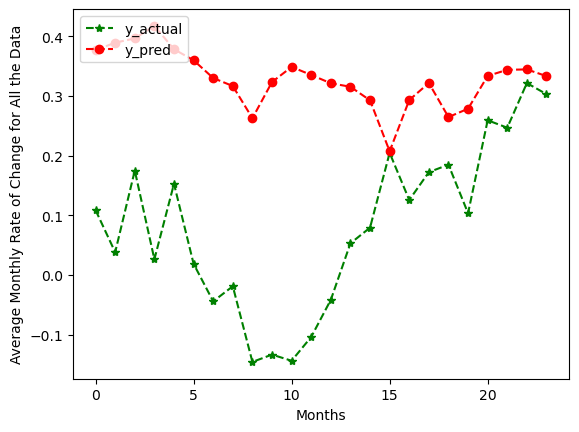

In [108]:
X_test_1 = d_X_test[6].copy()
y_test_1 = d_y_test[6].copy()
y_pred_1 = d_y_pred[6].copy()
sektor_actual = []
sektor_pred = []       
for i in range(24):
    Xtestdf = X_test_1[-215:]
    Xtestdf["Y"] = y_test_1[-215:]
    Xtestdf["Y_predicted"] = y_pred_1[-215:]
    X_test_1 = X_test_1[:-215]
    y_test_1 = y_test_1[:-215]
    y_pred_1 = y_pred_1[:-215]
    sektor_actual.append(np.mean(Xtestdf['Y']))
    sektor_pred.append(np.mean(Xtestdf['Y_predicted']))  
plt.plot(sektor_actual,'g*', sektor_pred, 'ro',linestyle = "dashed")
plt.legend(["y_actual", "y_pred"],loc='upper left', frameon=True)
plt.ylabel("Average Monthly Rate of Change for All the Data")
plt.xlabel("Months")
plt.show()


In [109]:
def plot_result(years_of_test, X_test, y_test, y_pred):
    dict_values = {}
    for a in liste:
        X_test_1 = X_test.copy()
        y_test_1 = y_test.copy()
        y_pred_1 = y_pred.copy()
        sektor_actual = []
        sektor_pred = []       
        for i in range(24):
            Xtestdf = X_test_1[-215:]
            Xtestdf["Y"] = y_test_1[-215:]
            Xtestdf["Y_predicted"] = y_pred_1[-215:]
            X_test_1 = X_test_1[:-215]
            y_test_1 = y_test_1[:-215]
            y_pred_1 = y_pred_1[:-215]
            sektor_actual.append(np.mean(Xtestdf[Xtestdf[a] == 1]['Y']))
            sektor_pred.append(np.mean(Xtestdf[Xtestdf[a] == 1]['Y_predicted'])) 
        dict_values[a] = [np.mean(Xtestdf[Xtestdf[a] == 1]['Y'])]
        dict_values[a].append(np.mean(Xtestdf[Xtestdf[a] == 1]['Y_predicted']))   
        plt.plot(sektor_actual,'g*', sektor_pred, 'ro',linestyle = "dashed")
        plt.legend(["y_actual", "y_pred"],loc='upper left', frameon=True)
        plt.ylabel("Average Monthly Rate of Change for {}".format(a))
        plt.xlabel("{}".format(a))
        plt.show()
        print("Number of firms in the sector is: {}".format(sector_nums[a]))
        print(dict_values[a])
        print("mean_absolute_error_of_{}: ".format(a),mean_absolute_error(Xtestdf[Xtestdf[a] == 1]['Y'], Xtestdf[Xtestdf[a] == 1]['Y_predicted']))
    return dict_values

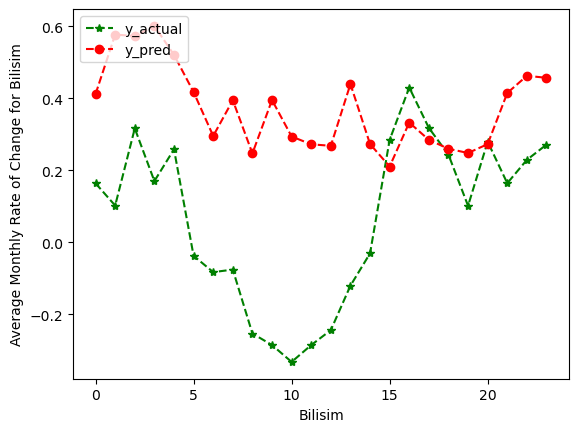

Number of firms in the sector is: 10.0
[0.2712436384287094, 0.45702657103538513]
mean_absolute_error_of_Bilisim:  0.33688885091306053


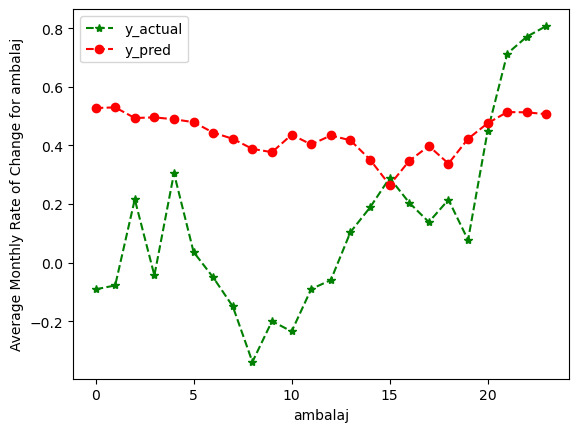

Number of firms in the sector is: 5.0
[0.8079126014079725, 0.5065400004386902]
mean_absolute_error_of_ambalaj:  0.45251373211881674


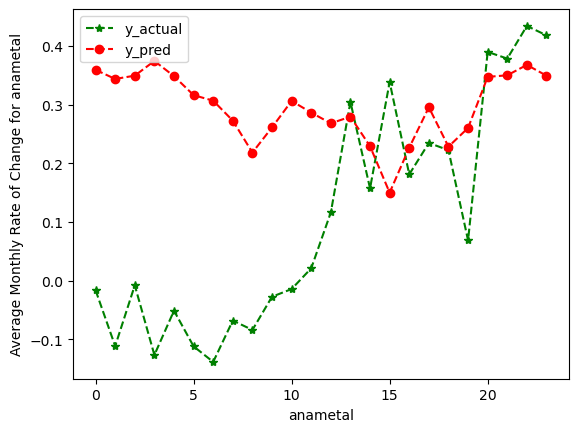

Number of firms in the sector is: 13.0
[0.4183222025642434, 0.3495725095272064]
mean_absolute_error_of_anametal:  0.18179432774376753


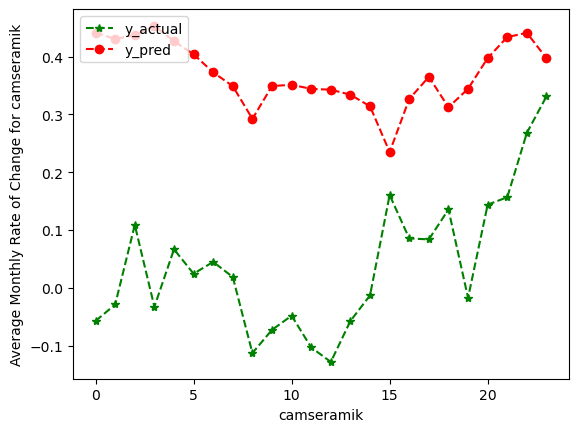

Number of firms in the sector is: 7.0
[0.3310756201151933, 0.39691224694252014]
mean_absolute_error_of_camseramik:  0.3028554405873588


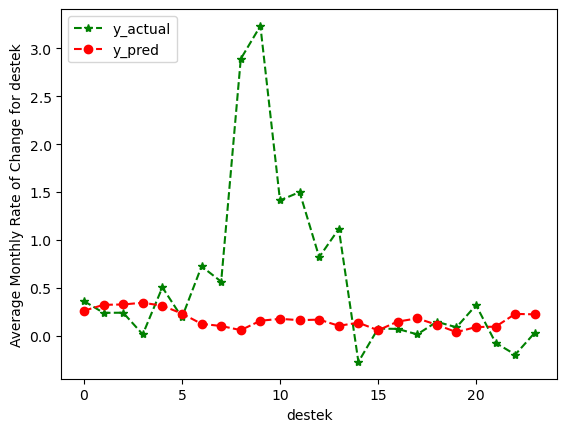

Number of firms in the sector is: 1.0
[0.035087719298245945, 0.22542305290699005]
mean_absolute_error_of_destek:  0.1903353336087441


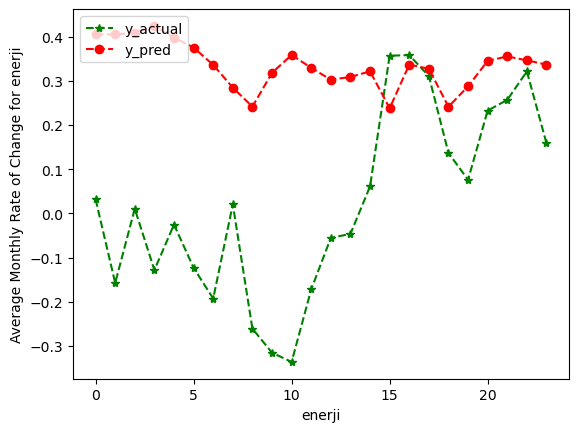

Number of firms in the sector is: 6.0
[0.15869267140998958, 0.336615651845932]
mean_absolute_error_of_enerji:  0.20794184632483745


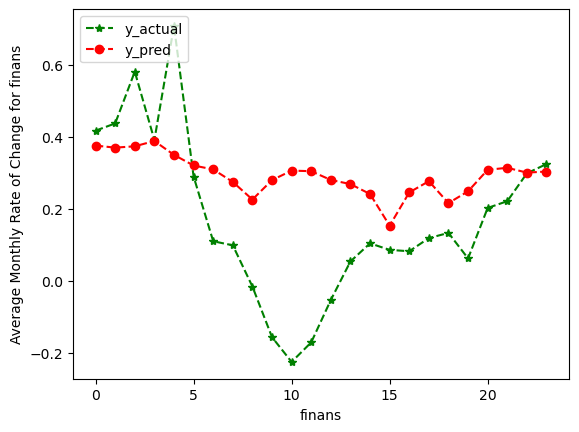

Number of firms in the sector is: 22.0
[0.3245580477856023, 0.3037821650505066]
mean_absolute_error_of_finans:  0.12430818002301294


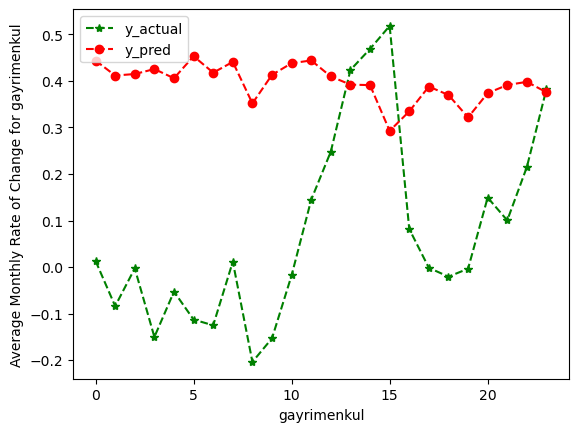

Number of firms in the sector is: 12.0
[0.3828751769240313, 0.3756624758243561]
mean_absolute_error_of_gayrimenkul:  0.2512304827109592


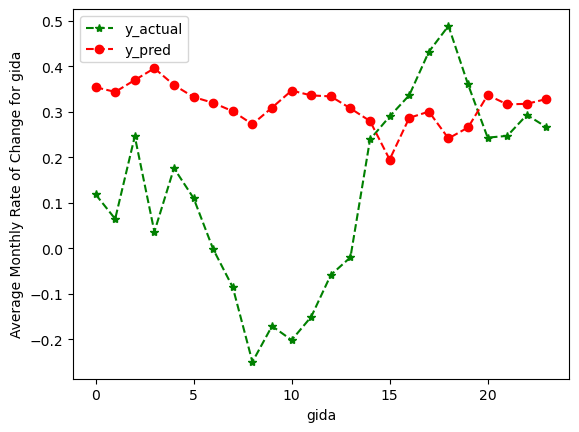

Number of firms in the sector is: 18.0
[0.26623943032331876, 0.3282722234725952]
mean_absolute_error_of_gida:  0.33919434659064085


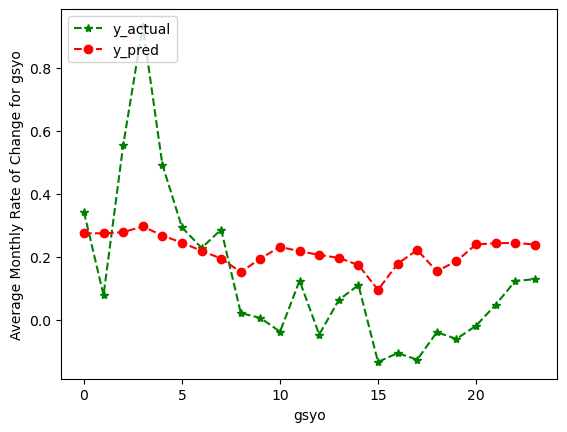

Number of firms in the sector is: 1.0
[0.12962962962962954, 0.23979157209396362]
mean_absolute_error_of_gsyo:  0.11016194246433408


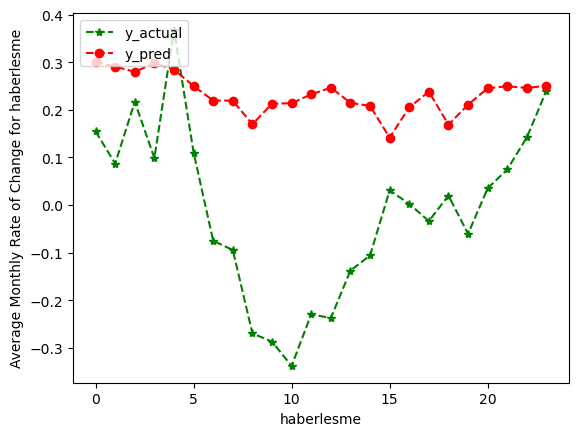

Number of firms in the sector is: 3.0
[0.24050473695154326, 0.25059351325035095]
mean_absolute_error_of_haberlesme:  0.03087037680436196


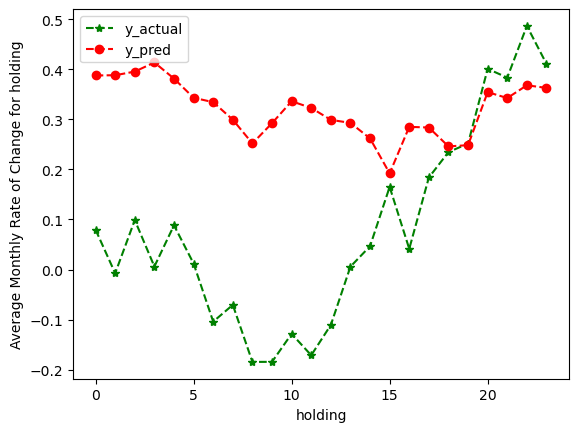

Number of firms in the sector is: 13.0
[0.41109420377160955, 0.3630838394165039]
mean_absolute_error_of_holding:  0.3322513430058329


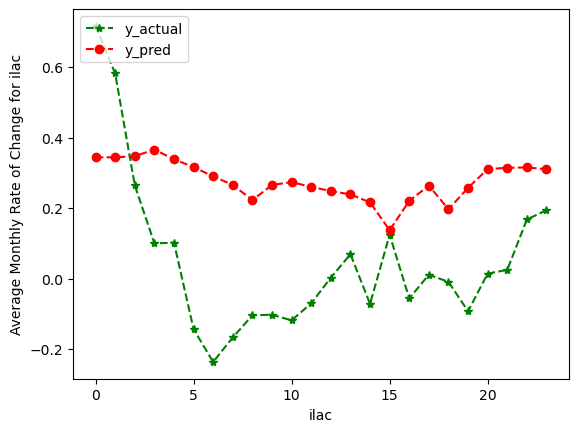

Number of firms in the sector is: 2.0
[0.19374159074309005, 0.31003066897392273]
mean_absolute_error_of_ilac:  0.11628907823083268


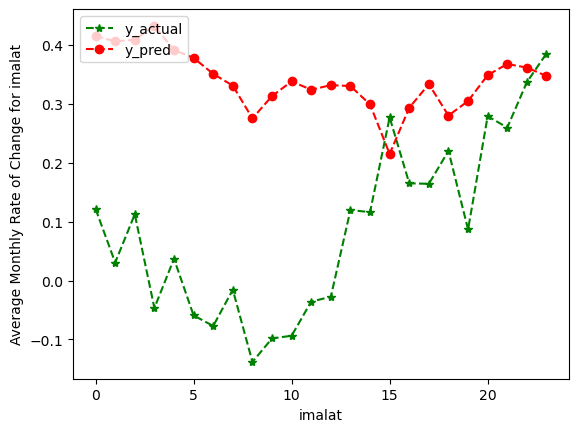

Number of firms in the sector is: 26.0
[0.38527361214777156, 0.34718042612075806]
mean_absolute_error_of_imalat:  0.2129673055853312


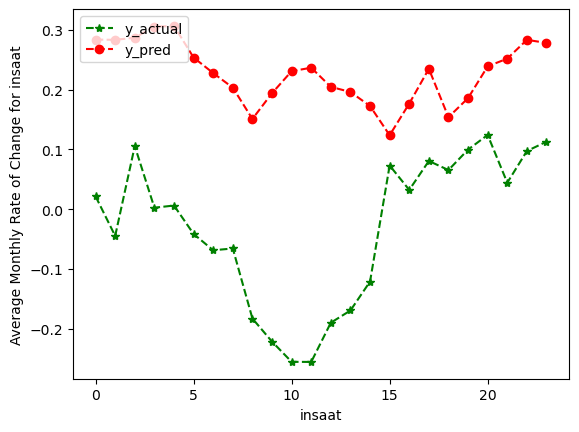

Number of firms in the sector is: 3.0
[0.11295502740383763, 0.27806687355041504]
mean_absolute_error_of_insaat:  0.16511183621246994


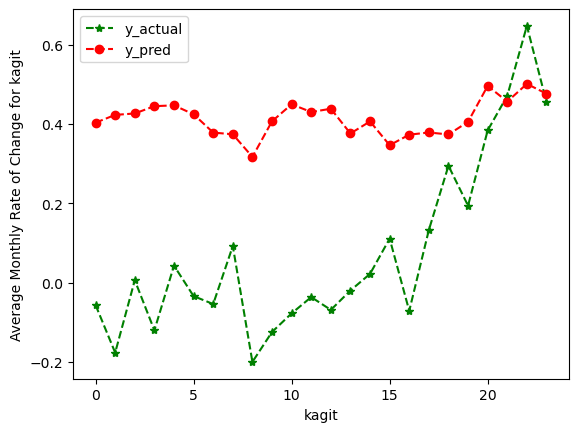

Number of firms in the sector is: 4.0
[0.45535472000276805, 0.4765917658805847]
mean_absolute_error_of_kagit:  0.10397537322536293


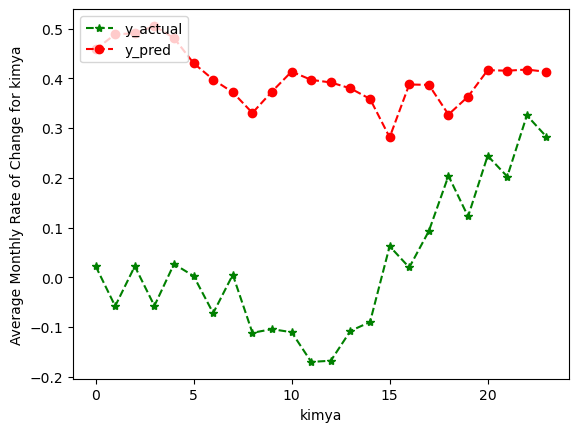

Number of firms in the sector is: 9.0
[0.2823880382227905, 0.41294124722480774]
mean_absolute_error_of_kimya:  0.19457993749156974


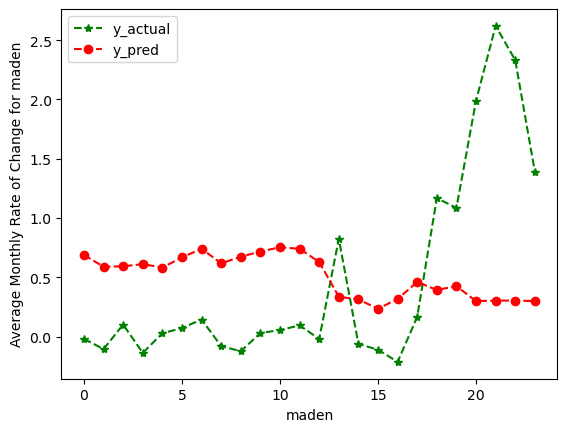

Number of firms in the sector is: 1.0
[1.3902439024390247, 0.29931625723838806]
mean_absolute_error_of_maden:  1.0909276452006367


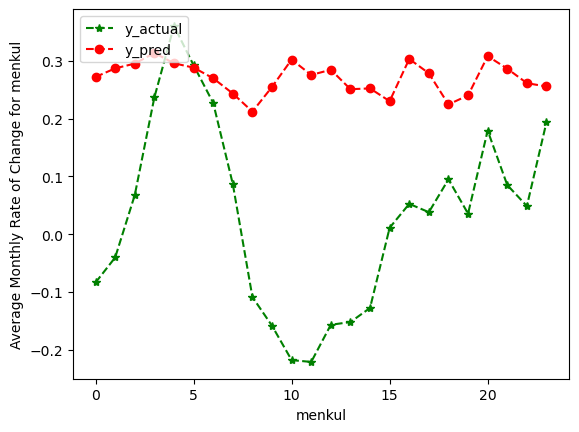

Number of firms in the sector is: 5.0
[0.19410852258049366, 0.255924791097641]
mean_absolute_error_of_menkul:  0.11796171565136444


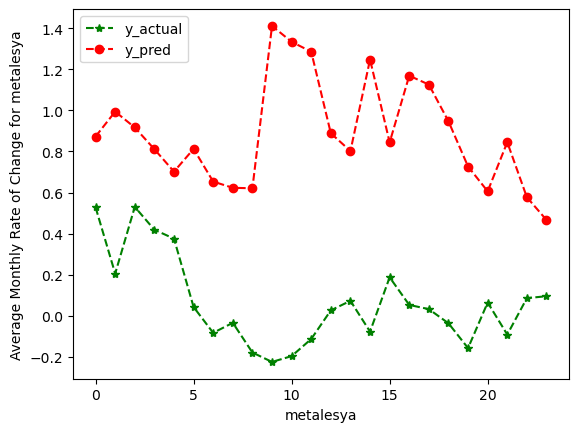

Number of firms in the sector is: 3.0
[0.095592088012815, 0.466766357421875]
mean_absolute_error_of_metalesya:  0.37117425947495253


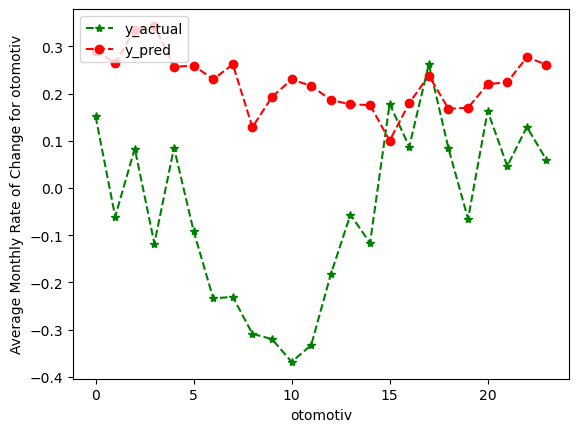

Number of firms in the sector is: 4.0
[0.059175285915911036, 0.26122838258743286]
mean_absolute_error_of_otomotiv:  0.20205310039681212


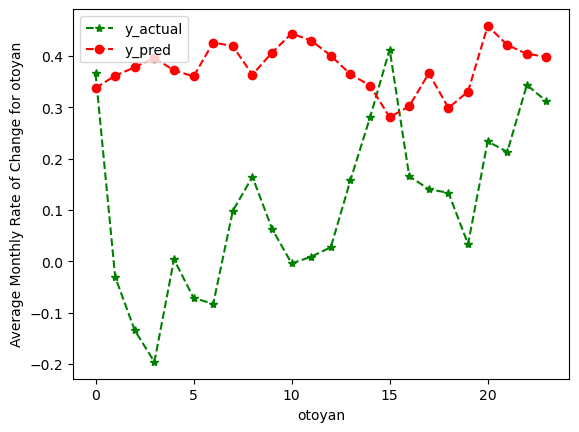

Number of firms in the sector is: 3.0
[0.31161749358758933, 0.3987305164337158]
mean_absolute_error_of_otoyan:  0.16972198998648766


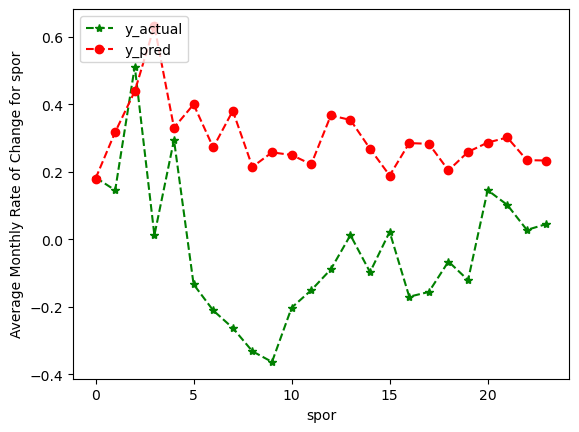

Number of firms in the sector is: 4.0
[0.045625239839201887, 0.2337101697921753]
mean_absolute_error_of_spor:  0.18808493554090885


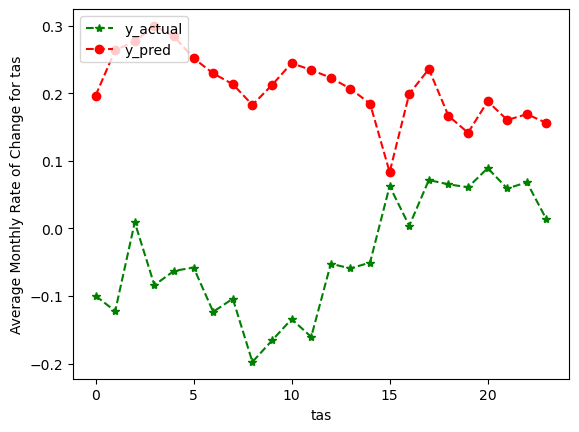

Number of firms in the sector is: 16.0
[0.01323967194879485, 0.15594220161437988]
mean_absolute_error_of_tas:  0.15467534391404336


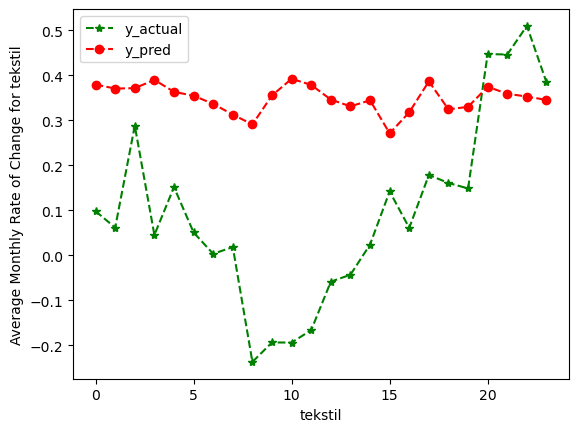

Number of firms in the sector is: 10.0
[0.3844485803706081, 0.3452737629413605]
mean_absolute_error_of_tekstil:  0.2665246317098804


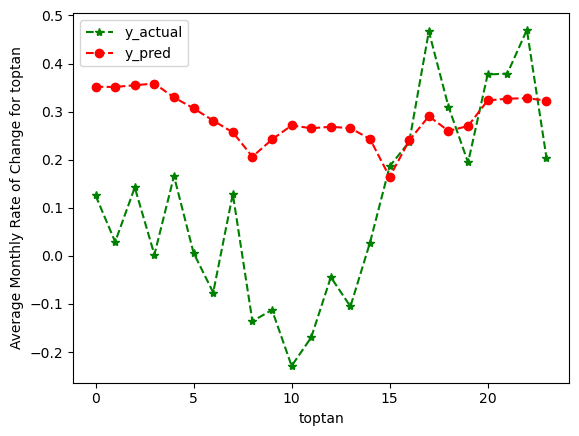

Number of firms in the sector is: 4.0
[0.20402928294376488, 0.3228597342967987]
mean_absolute_error_of_toptan:  0.1397249662399903


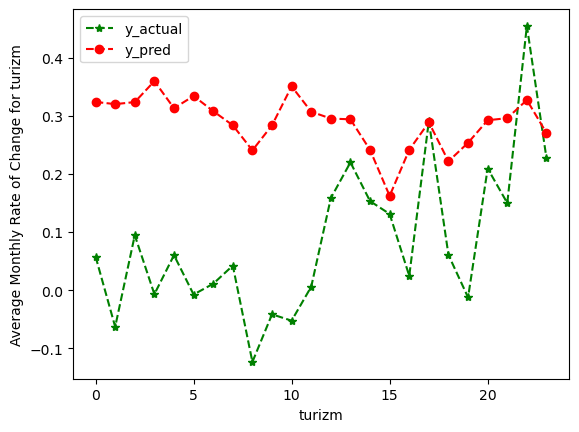

Number of firms in the sector is: 6.0
[0.22696431742832837, 0.27035269141197205]
mean_absolute_error_of_turizm:  0.13227041135599565


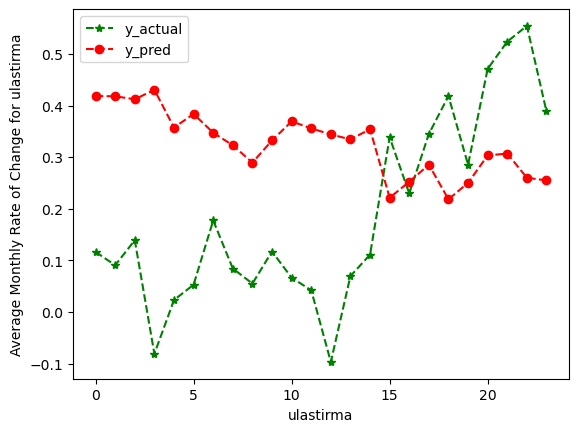

Number of firms in the sector is: 4.0
[0.388494090370337, 0.25483468174934387]
mean_absolute_error_of_ulastirma:  0.19127905540270518


{'Bilisim': [0.2712436384287094, 0.45702657103538513],
 'ambalaj': [0.8079126014079725, 0.5065400004386902],
 'anametal': [0.4183222025642434, 0.3495725095272064],
 'camseramik': [0.3310756201151933, 0.39691224694252014],
 'destek': [0.035087719298245945, 0.22542305290699005],
 'enerji': [0.15869267140998958, 0.336615651845932],
 'finans': [0.3245580477856023, 0.3037821650505066],
 'gayrimenkul': [0.3828751769240313, 0.3756624758243561],
 'gida': [0.26623943032331876, 0.3282722234725952],
 'gsyo': [0.12962962962962954, 0.23979157209396362],
 'haberlesme': [0.24050473695154326, 0.25059351325035095],
 'holding': [0.41109420377160955, 0.3630838394165039],
 'ilac': [0.19374159074309005, 0.31003066897392273],
 'imalat': [0.38527361214777156, 0.34718042612075806],
 'insaat': [0.11295502740383763, 0.27806687355041504],
 'kagit': [0.45535472000276805, 0.4765917658805847],
 'kimya': [0.2823880382227905, 0.41294124722480774],
 'maden': [1.3902439024390247, 0.29931625723838806],
 'menkul': [0.194

In [110]:
plot_result(2, d_X_test[6], d_y_test[6], d_y_pred[6])

<BarContainer object of 22 artists>

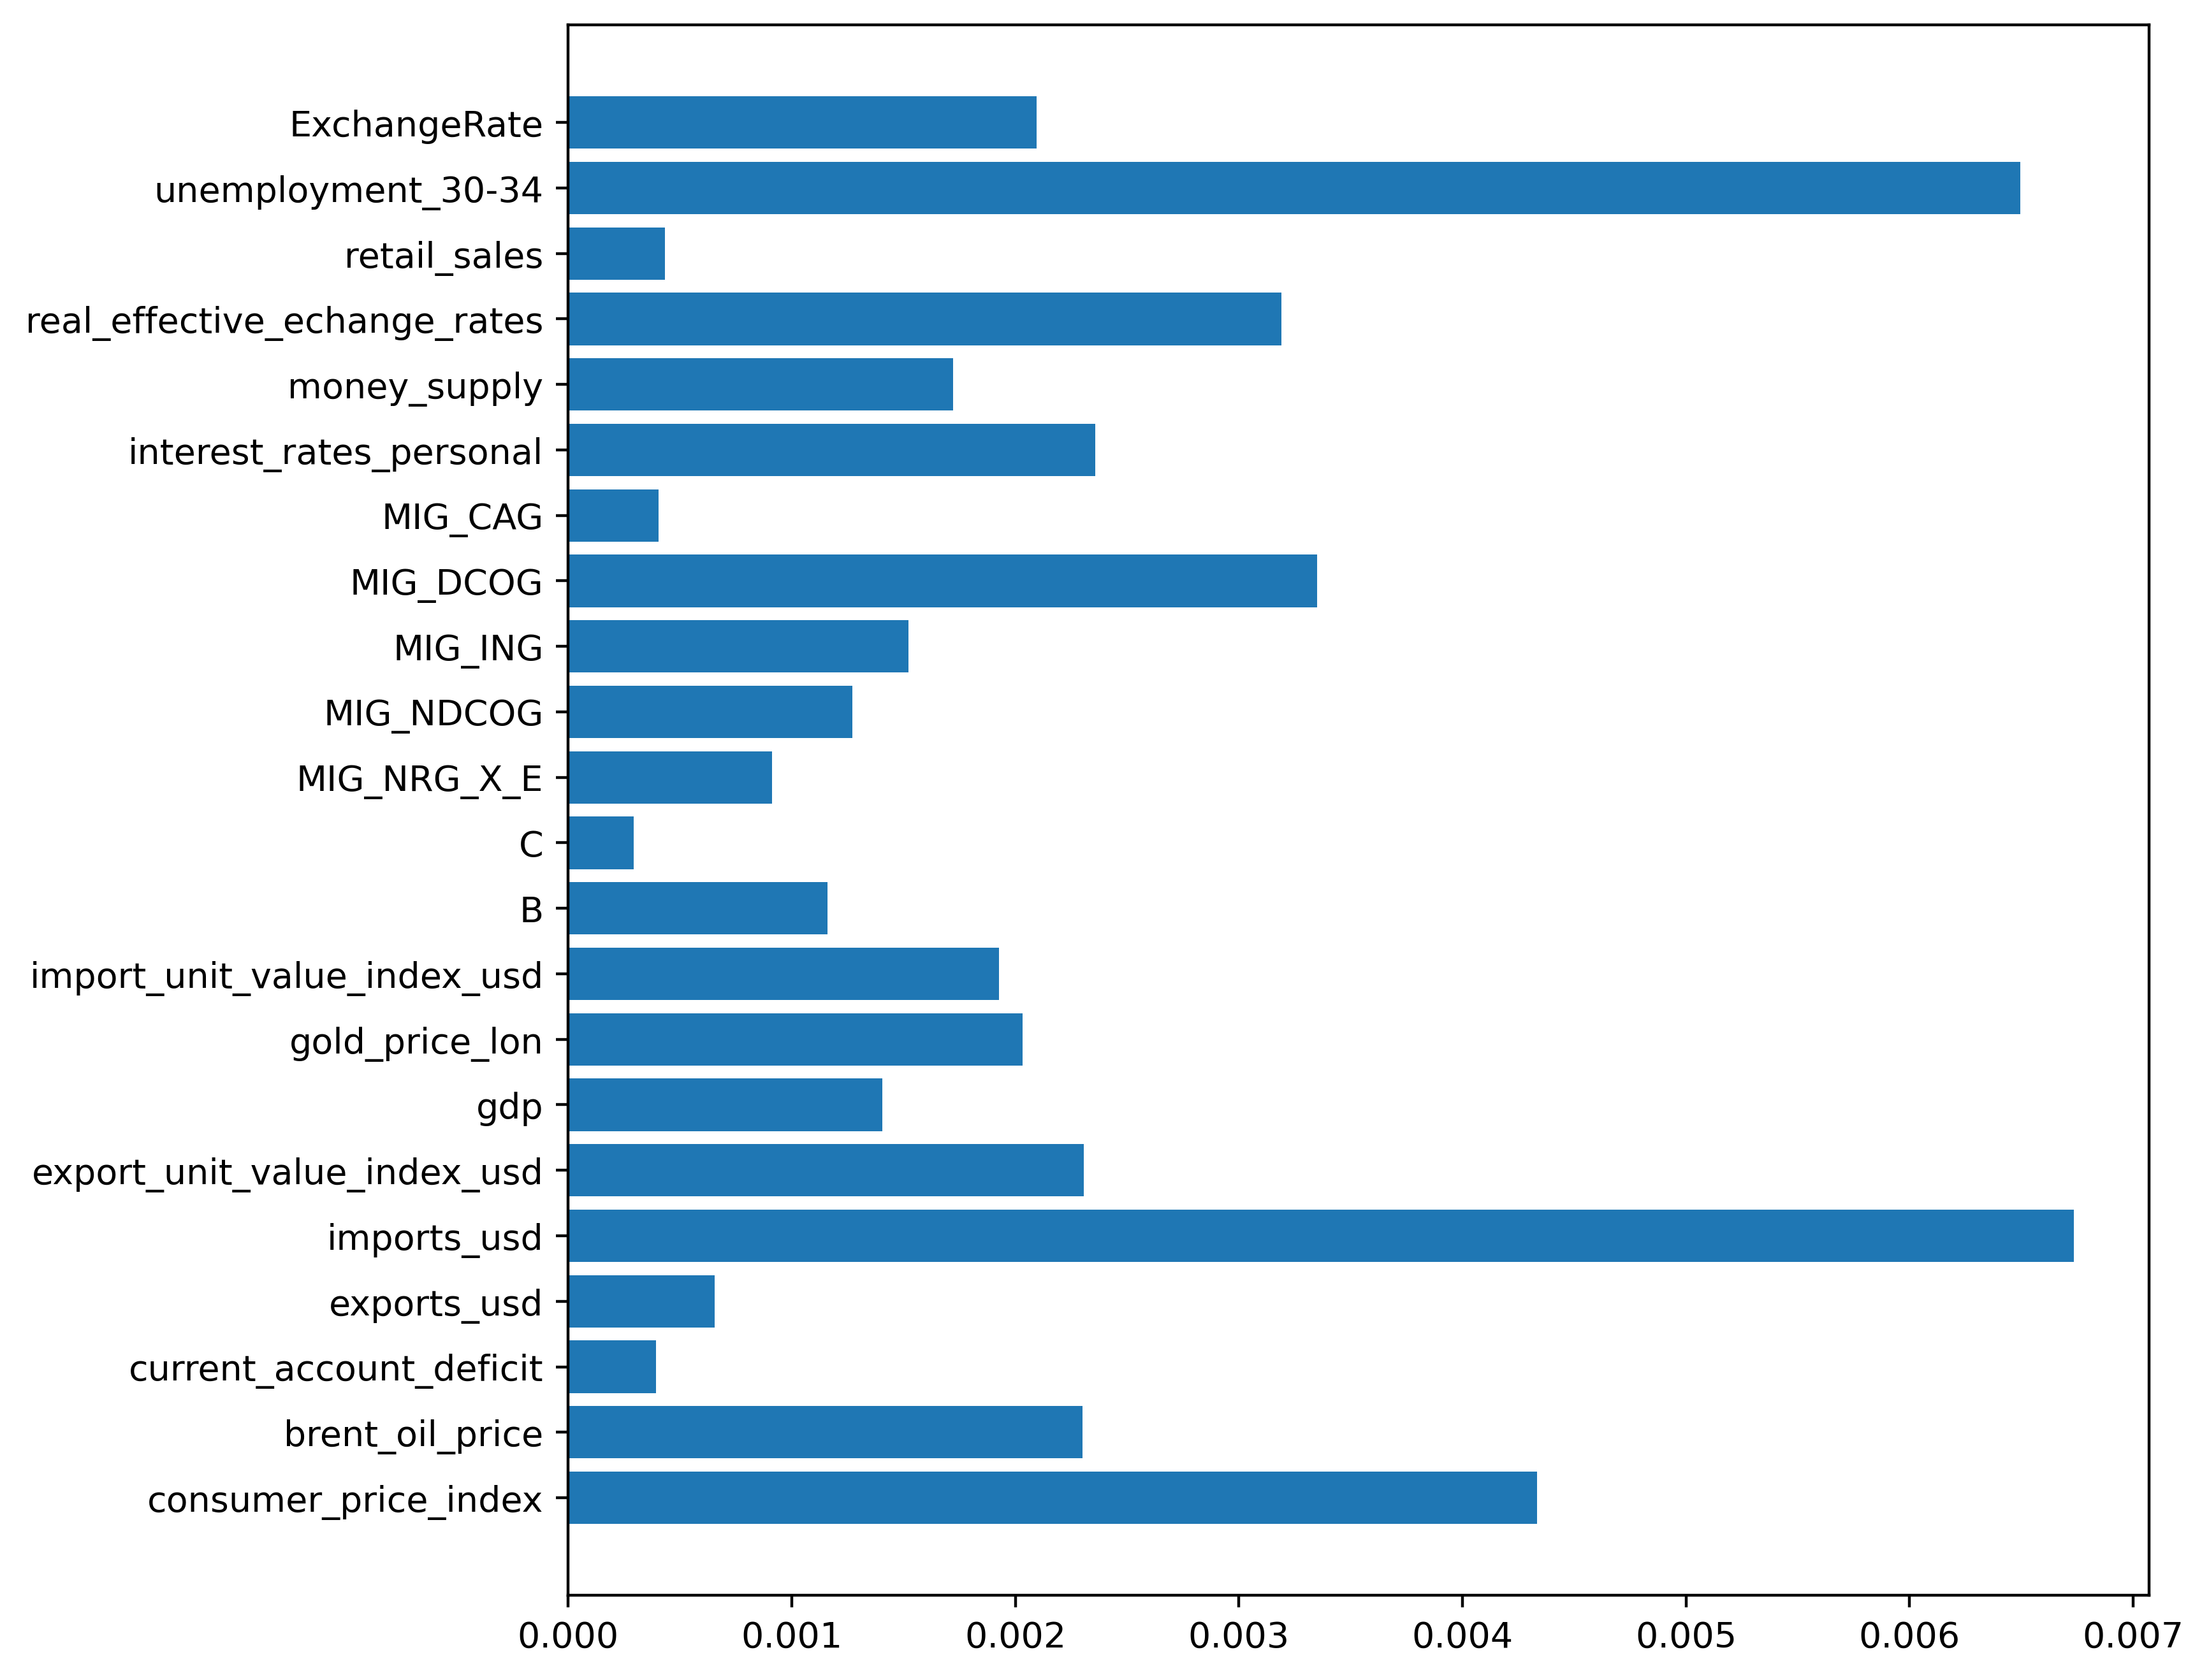

In [113]:
figure(figsize=(8, 8), dpi=400)
plt.barh(d_X_test[6].columns[-22:], xgb_r.feature_importances_[-22:])

